In [82]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [83]:
df = pd.read_csv("List of Countries by Sugarcane Production.csv")

In [84]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [85]:
df.shape

(103, 7)

# Data Cleaning


In [86]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.','')

In [87]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [88]:
df.rename(columns= {"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns= {"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns= {"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns= {"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [89]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [90]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [91]:
df[df['Acreage(Hectare)'].isna()]

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,Djibouti,Africa,53,51,NaN,NaN


In [92]:
df = df.dropna().reset_index().drop("index", axis = 1)

In [93]:
df.isna().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             0
Yield(Kg/Hectare)            0
dtype: int64

In [94]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [95]:
df['Production(Tons)'] = df['Production(Tons)'].astype(float)
df['Production_per_person(Kg)'] = df['Production_per_person(Kg)'].astype(float)
df['Yield(Kg/Hectare)'] = df['Yield(Kg/Hectare)'].astype(float)
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].astype(float)

In [96]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [97]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

# Univariate Analysis

In [99]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### How many countries produce sugarcane from each continent?

In [100]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

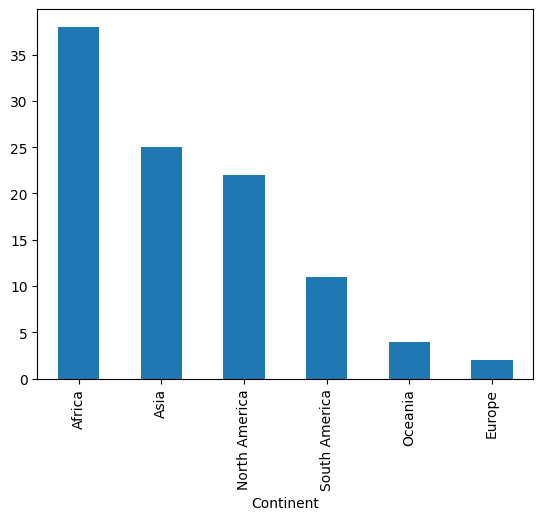

In [103]:
df['Continent'].value_counts().plot(kind = 'bar')

 Africa has maximum number of countries which produces sugarcane.

In [124]:
df.describe()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


### Checking outliers

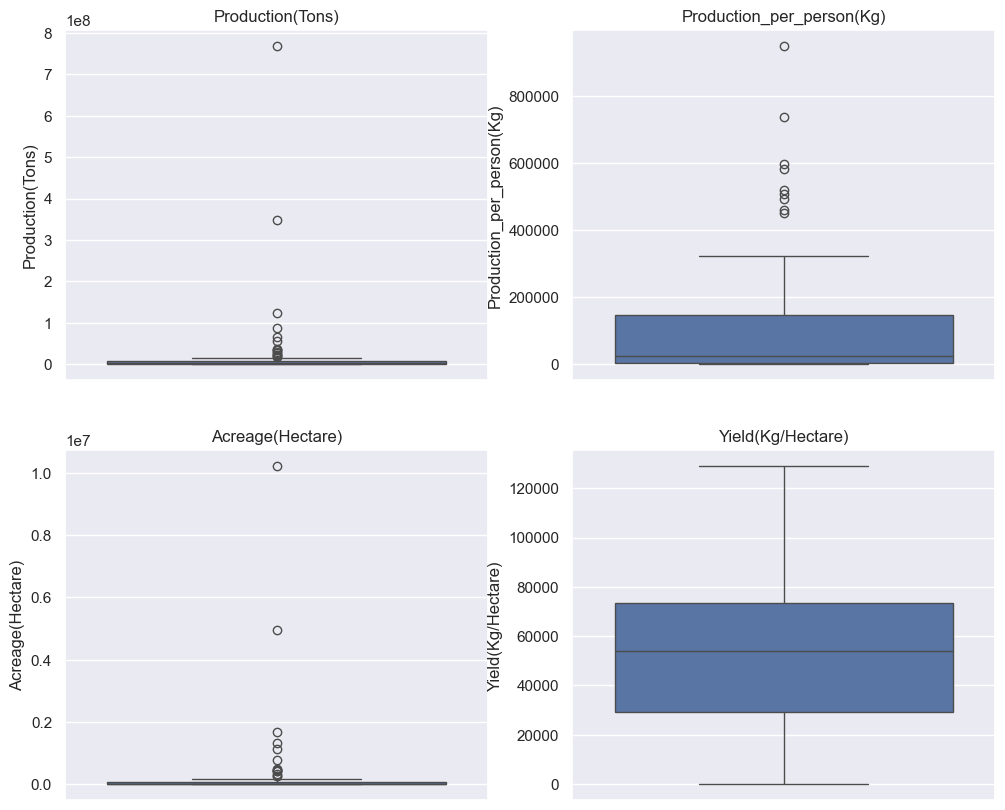

In [129]:
plt.figure(figsize = (12,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

we have outliers in the data but outliers are required here as it shows the countries which has maximum production. And then we can see what are the reasons for outliers

### Distribution of the columns

C:\Users\Ramzal\AppData\Local\Temp\ipykernel_7664\1909675950.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\Ramzal\AppData\Local\Temp\ipykernel_7664\1909675950.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production_per_person(Kg)"])
C:\Users\Ramz

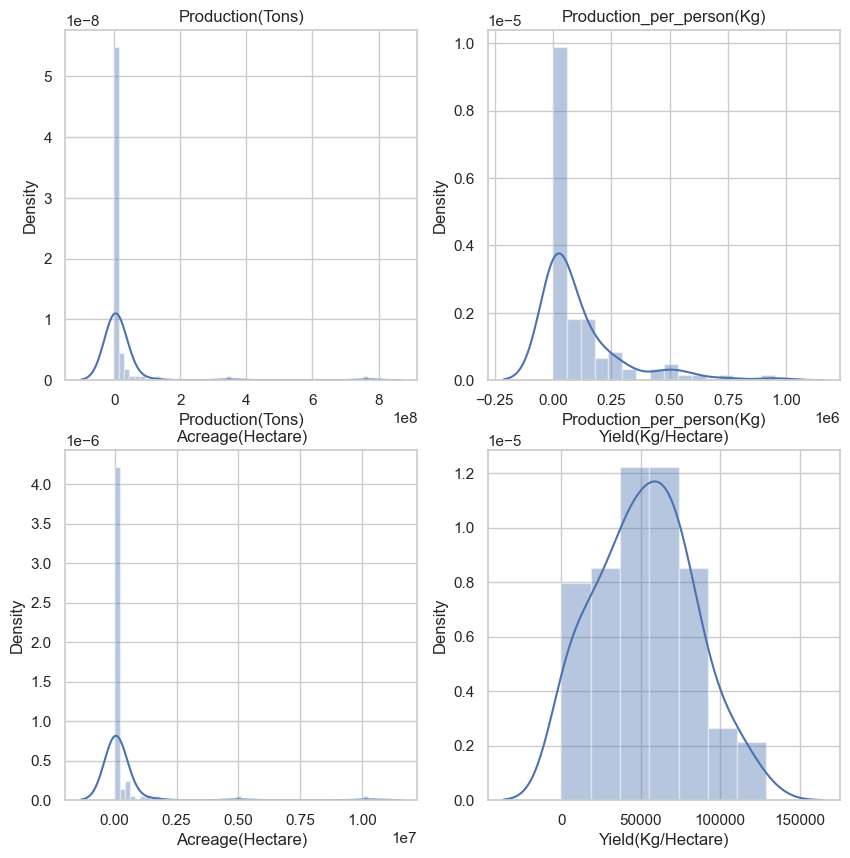

In [172]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])
plt.title("Production(Tons)")
plt.subplot(2,2,2)
sns.distplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")
plt.show()

# Bivariate Analysis

In [182]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### Which country produces maximum sugarcane?

In [138]:
df_new = df[['Country','Production(Tons)']].set_index('Country')

In [139]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [156]:
df_new['Production_Percent'] = (df_new['Production(Tons)']*100)/(df_new['Production(Tons)'].sum())
df_new.round({'Production_Percent': 2})

,Production(Tons),Production_Percent
Country,,
Brazil,768678382.0,40.73
India,348448000.0,18.46
China,123059739.0,6.52
Thailand,87468496.0,4.63
Pakistan,65450704.0,3.47
...,...,...
Spain,394.0,0.00
Lebanon,97.0,0.00
Singapore,50.0,0.00


<Axes: ylabel='Production_Percent'>

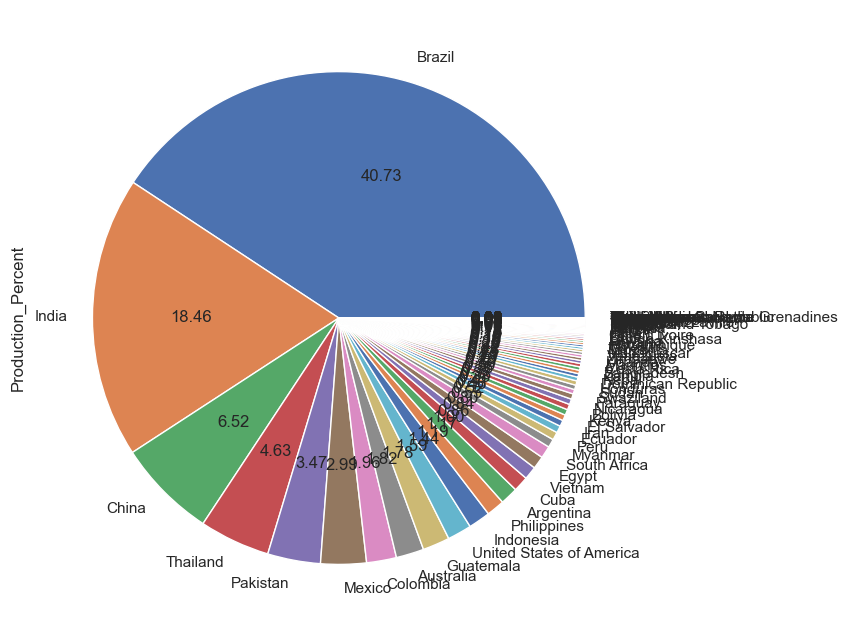

In [171]:
df_new["Production_Percent"].plot(kind = "pie", autopct = "%.2f",figsize=(8, 8))

Brazil, India and China have 65% of production of sugarcane

C:\Users\Ramzal\AppData\Local\Temp\ipykernel_7664\1166765578.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df.head(15),  x= "Country", y = "Production(Tons)",palette="tab10")
C:\Users\Ramzal\AppData\Local\Temp\ipykernel_7664\1166765578.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


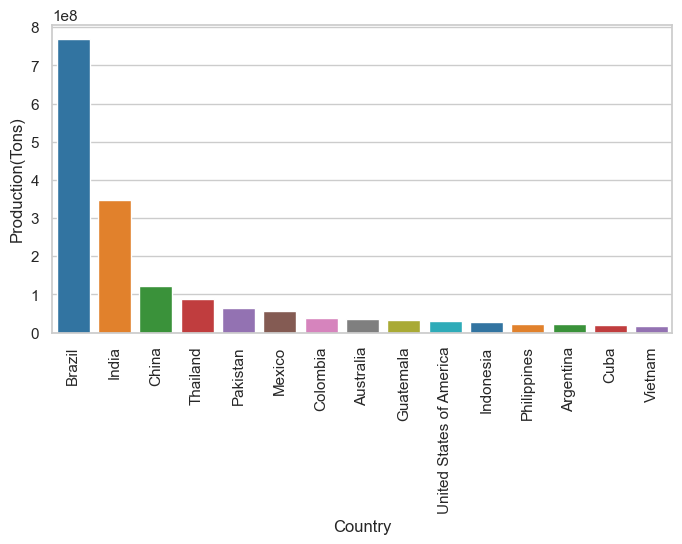

In [168]:
ax = sns.barplot(data = df.head(15),  x= "Country", y = "Production(Tons)",palette="tab10")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

The country "Brazil" produces maximum sugarcane out of all countries.

### Which country has highest land?

C:\Users\Ramzal\AppData\Local\Temp\ipykernel_7664\4133537375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage(Hectare)",palette="tab10")
C:\Users\Ramzal\AppData\Local\Temp\ipykernel_7664\4133537375.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


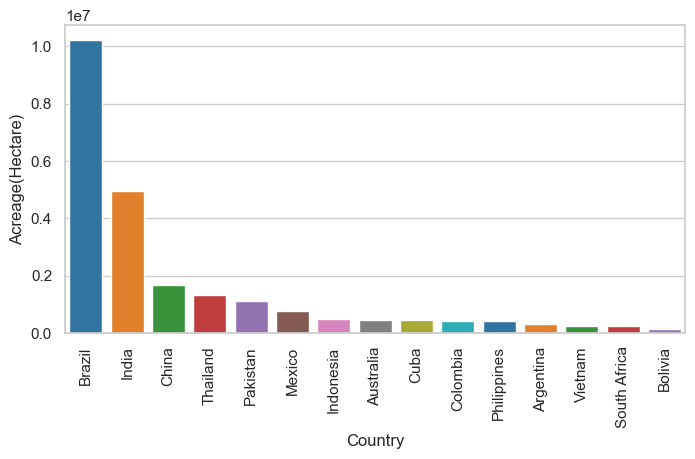

In [175]:
df_acr = df.sort_values("Acreage(Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_acr,  x= "Country", y = "Acreage(Hectare)",palette="tab10")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

### Which country has highest yield per hectare?

C:\Users\Ramzal\AppData\Local\Temp\ipykernel_7664\1487297573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_yld,  x= "Country", y = "Yield(Kg/Hectare)",palette="tab10")
C:\Users\Ramzal\AppData\Local\Temp\ipykernel_7664\1487297573.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


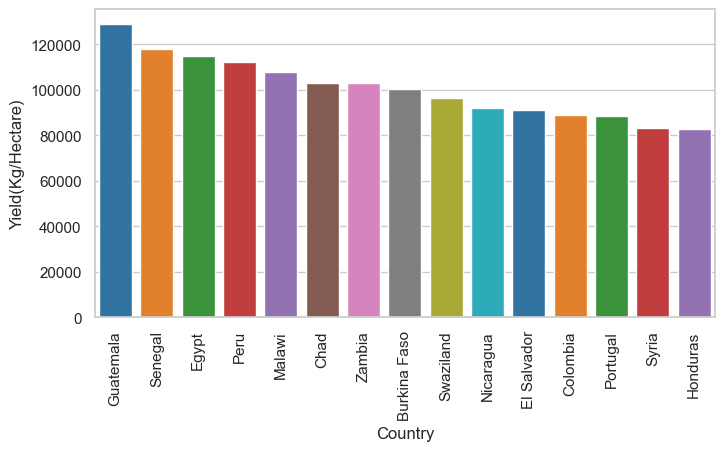

In [178]:
df_yld = df.sort_values("Yield(Kg/Hectare)", ascending = False).head(15)
ax = sns.barplot(data = df_yld,  x= "Country", y = "Yield(Kg/Hectare)",palette="tab10")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

Guatemala has the highest yield(kg/hectare)

### Which country has highest Production_per_person(Kg)?

C:\Users\Ramzal\AppData\Local\Temp\ipykernel_7664\613211273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_yld,  x= "Country", y = "Production_per_person(Kg)",palette="tab10")
C:\Users\Ramzal\AppData\Local\Temp\ipykernel_7664\613211273.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =90)


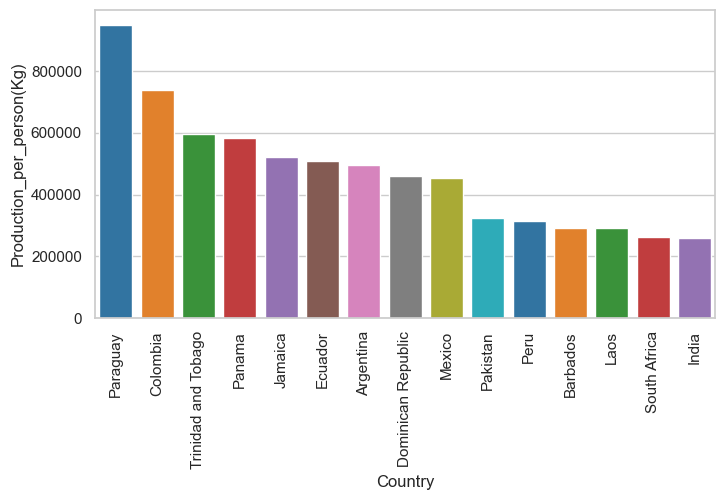

In [179]:
df_yld = df.sort_values("Production_per_person(Kg)", ascending = False).head(15)
ax = sns.barplot(data = df_yld,  x= "Country", y = "Production_per_person(Kg)",palette="tab10")
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
plt.show()

### Correlation

In [191]:
df[['Production(Tons)','Production_per_person(Kg)','Acreage(Hectare)','Yield(Kg/Hectare)']].corr()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

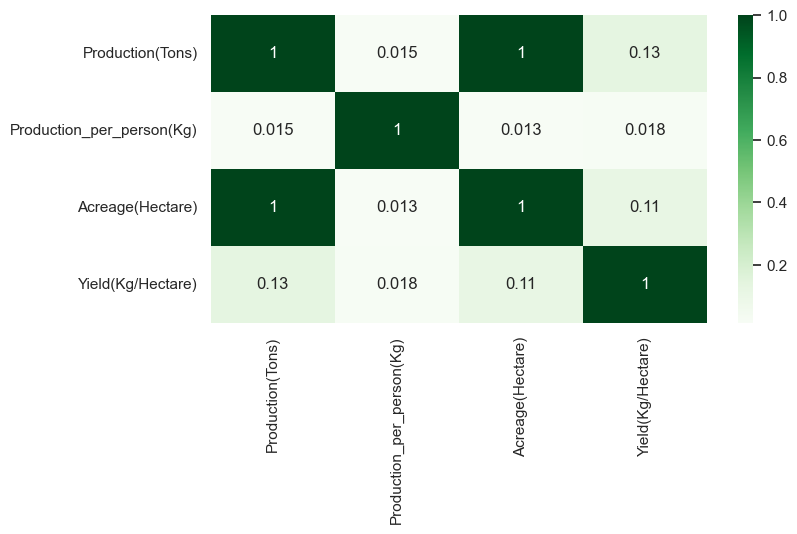

In [200]:
df_corr = df[['Production(Tons)','Production_per_person(Kg)','Acreage(Hectare)','Yield(Kg/Hectare)']].corr()
sns.heatmap(df_corr, annot = True, cmap="Greens")


Production(Tons) and Acreage(Hectare) is highly correlated

### Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

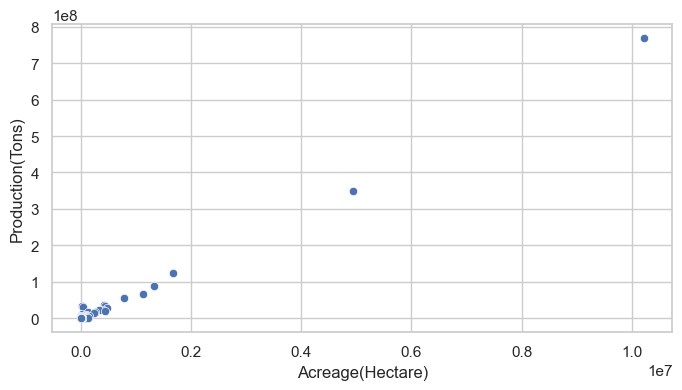

In [201]:
sns.scatterplot(data = df,x='Acreage(Hectare)',y = 'Production(Tons)')

Yes, Sugarcane Production is correlated to Production Land

### Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

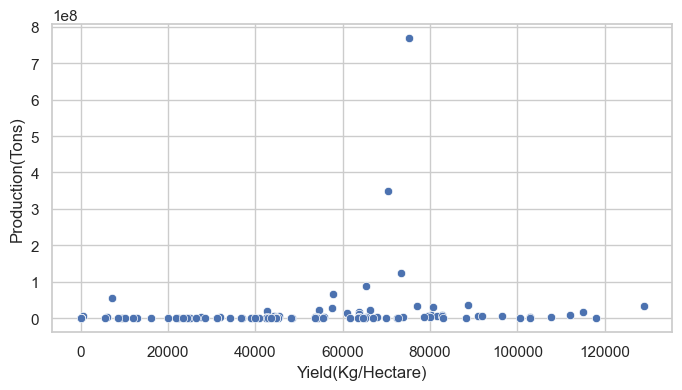

In [202]:
sns.scatterplot(data = df, x = "Yield(Kg/Hectare)" , y = "Production(Tons)")

# Analysis for Continent

In [204]:
df_continent = df.groupby("Continent").sum()
df_continent["number_of_countries"] = df.groupby("Continent").count()["Country"]
df_continent

,Country,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11


### Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

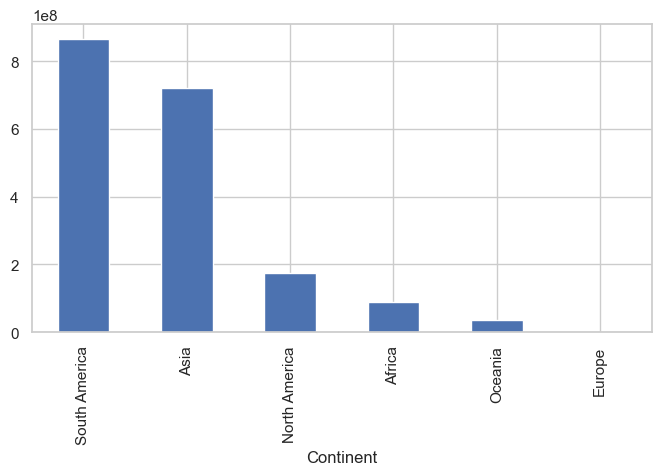

In [205]:
df_continent["Production(Tons)"].sort_values(ascending =  False).plot(kind = "bar")

### Do continent with highest land produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

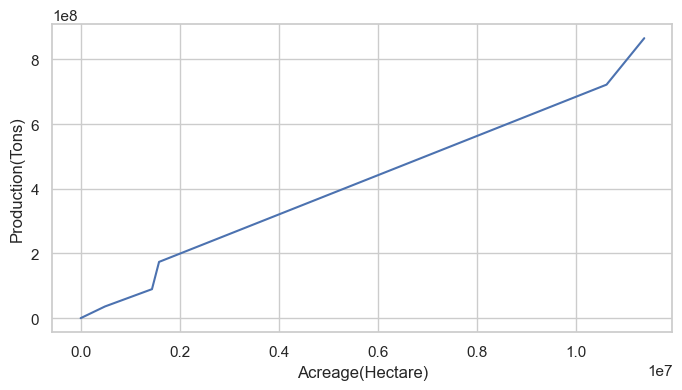

In [206]:
sns.lineplot(data = df_continent,x = "Acreage(Hectare)", y= "Production(Tons)" )

### Do number of countries in a Continent effects production of sugarcane?

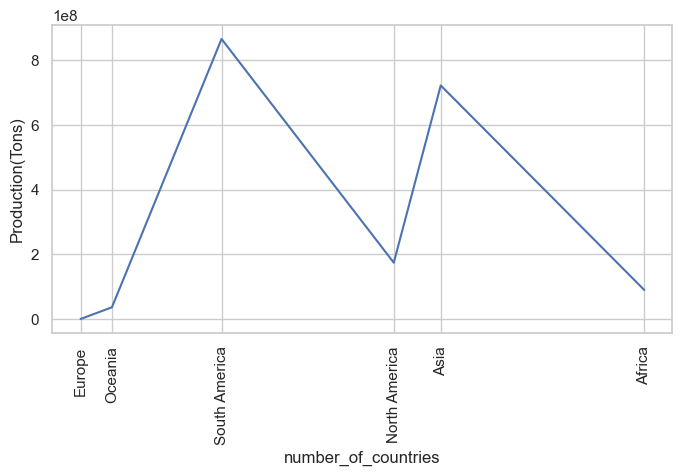

In [216]:
continent_names = df_continent.index.to_list()
sns.lineplot(data = df_continent,x = "number_of_countries", y= "Production(Tons)" )
plt.xticks(df_continent["number_of_countries"], continent_names, rotation =90)
plt.show()

### Production distribution by continent

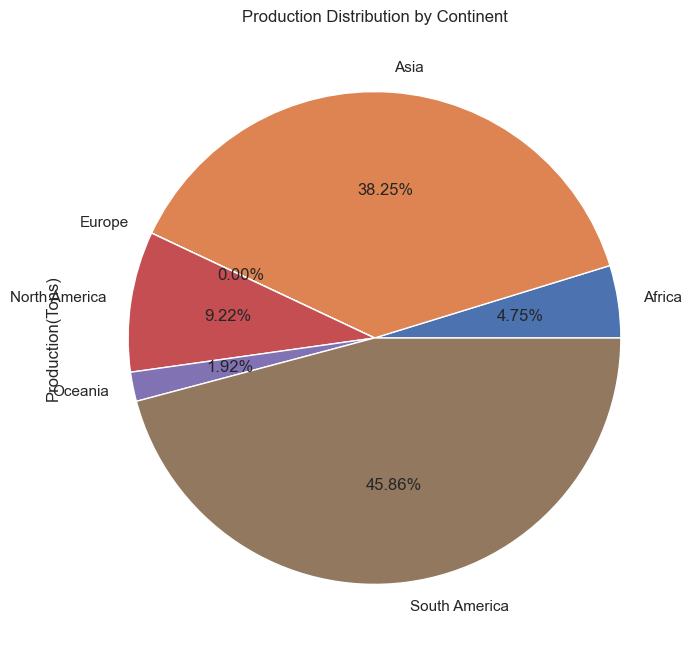

In [222]:
df_continent["Production(Tons)"].plot(kind = "pie", autopct = "%.2f%%",figsize=(8,8))
plt.title('Production Distribution by Continent')
plt.show()

### Correlation for continent

In [219]:
df_continent[['Production(Tons)','Production_per_person(Kg)','Acreage(Hectare)','Yield(Kg/Hectare)','number_of_countries']].corr()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000
